<a href="https://colab.research.google.com/github/sterlinggutterman/visualization/blob/main/SG_EDA_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [1]:
! git clone https://github.com/sterlinggutterman/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 42 (delta 6), reused 9 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (42/42), 14.81 MiB | 18.57 MiB/s, done.
Resolving deltas: 100% (9/9), done.


**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### ***#1: loading data and cleaning the price variable***

In [25]:
df = pd.read_csv('/content/visualization/assignment/data/airbnb_hw.csv', low_memory=False)

# cleaning price variable
var = df['Price'] # price variable
var_clean = var.str.replace(",","", regex=False) # remove commas
var_clean = pd.to_numeric(var, errors='coerce') # coerce variable to numeric
df['Price'] = var_clean # replace price variable with clean version

#### ***#2: understanding the data***

In [26]:
# dimensions
print(df.shape,'\n')

# observations
print(df.dtypes, '\n')

# variables
print(df.columns,'\n')

# quick view
df.head()

(30478, 13) 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                         float64
Review Scores Rating          float64
dtype: object 

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object') 



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145.0,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37.0,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28.0,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199.0,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0


#### ***#3: cross-tabulating room type and property type***

In [27]:
# 3: cross-tabulating
pd.crosstab(df['Room Type'], df['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


- This data describes various property types and how many entire homes, private rooms, and shared rooms are available for each respectively
- The most amount of apartments are available and within this category, the most avaiable option is renting the entire apartment and the least available option is renting a shared room
- Other properties with lots of availabilities are houses and lofts
- Cabins, castles, chalets, campers, huts, lighthouses, tents, treehouses, and villas have the least amount of properties avaialble with less than 10 avaialblites between the three options
- For bed and breakfasts, dorms, houses, and the other category, it is more common to rent a private room

#### ***#4: graphing the price variable***

In [28]:
var = 'Price'

# statistical summaries
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')
print(df[var].describe(), '\n')

[145.  37.  28. 199. 549. 149. 250.  90. 270. 290. 170.  59.  49.  68.
 285.  75. 100. 150. 700. 125. 175.  40.  89.  95.  99. 499. 120.  79.
 110. 180. 143. 230. 350. 135.  85.  60.  70.  55.  44. 200. 165. 115.
  74.  84. 129.  50. 185.  80. 190. 140.  45.  65. 225. 600. 109.  nan
  73. 240.  72. 105. 155. 160.  42. 132. 117. 295. 280. 159. 107.  69.
 239. 220. 399. 130. 375. 585. 275. 139. 260.  35. 133. 300. 289. 179.
  98. 195.  29.  27.  39. 249. 192. 142. 169. 131. 138. 113. 122. 329.
 101. 475. 238. 272. 308. 126. 235. 315. 248. 128.  56. 207. 450. 215.
 210. 385. 445. 136. 247. 118.  77.  76.  92. 198. 205. 299. 222. 245.
 104. 153. 349. 114. 320. 292. 226. 420. 500. 325. 307.  78. 265. 108.
 123. 189.  32.  58.  86. 219. 800. 335.  63. 229. 425.  67.  87. 158.
 650. 234. 310. 695. 400. 166. 119.  62. 168. 340. 479.  43. 395. 144.
  52.  47. 529. 187. 209. 233.  82. 269. 163. 172. 305. 156. 550. 435.
 137. 124.  48. 279. 330. 134. 378.  97. 277.  64. 193. 147. 186. 264.
  30. 

<Axes: ylabel='Frequency'>

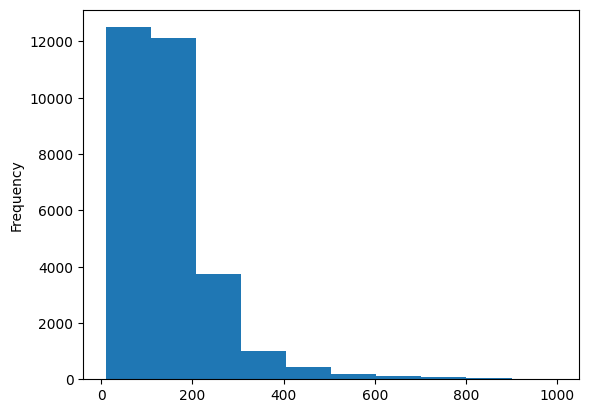

In [29]:
# histogram
df[var].plot.hist()

<Axes: ylabel='Density'>

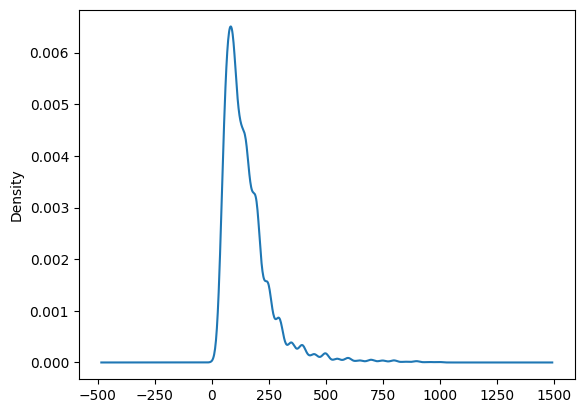

In [30]:
# kernal density
df[var].plot.density()

<Axes: >

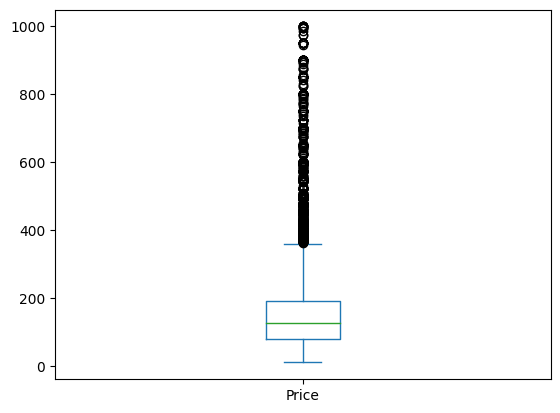

In [31]:
# box plot
df[var].plot.box()

Observations
- The data is badly scaled as all of the graphs are skewed right
- The outliers range from roughly 600 - 15000
- The box plot shows a significant number of values outside of the whiskers, as represented by the dots

[4.97673374 3.61091791 3.33220451 5.29330482 6.30809844 5.00394631
 5.52146092 4.49980967 5.59842196 5.66988092 5.13579844 4.07753744
 3.8918203  4.21950771 5.65248918 4.31748811 4.60517019 5.01063529
 6.55108034 4.82831374 5.16478597 3.68887945 4.48863637 4.55387689
 4.59511985 6.2126061  4.78749174 4.36944785 4.70048037 5.19295685
 4.96284463 5.43807931 5.85793315 4.90527478 4.44265126 4.09434456
 4.24849524 4.00733319 3.78418963 5.29831737 5.10594547 4.74493213
 4.30406509 4.4308168  4.8598124  3.91202301 5.22035583 4.38202663
 5.24702407 4.94164242 3.80666249 4.17438727 5.4161004  6.39692966
 4.69134788        nan 4.29045944 5.48063892 4.27666612 4.65396035
 5.04342512 5.07517382 3.73766962 4.88280192 4.76217393 5.68697536
 5.6347896  5.0689042  4.67282883 4.2341065  5.47646355 5.39362755
 5.98896142 4.86753445 5.92692603 6.37161185 5.6167711  4.93447393
 5.56068163 3.55534806 4.89034913 5.70378247 5.66642669 5.18738581
 4.58496748 5.27299956 3.36729583 3.29583687 3.66356165 5.5174

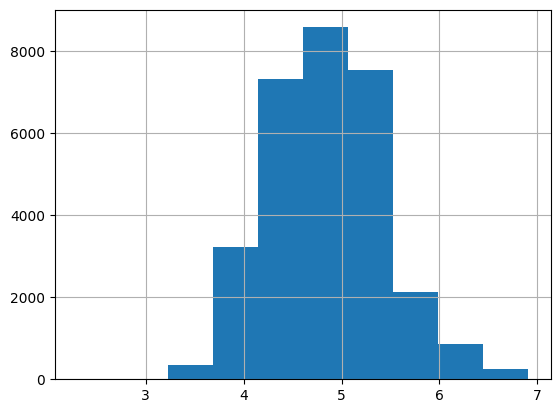

In [32]:
# creating price_log
df['price_log'] = np.log(df['Price'])
df.loc[df['price_log']>0,'price_log'].hist()

var = 'price_log'

# new statistical summaries
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')
print(df[var].describe(), '\n')

<Axes: ylabel='Frequency'>

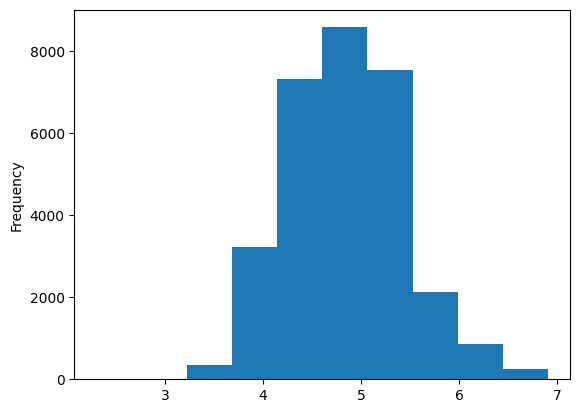

In [33]:
# histogram
df[var].plot.hist()

<Axes: ylabel='Density'>

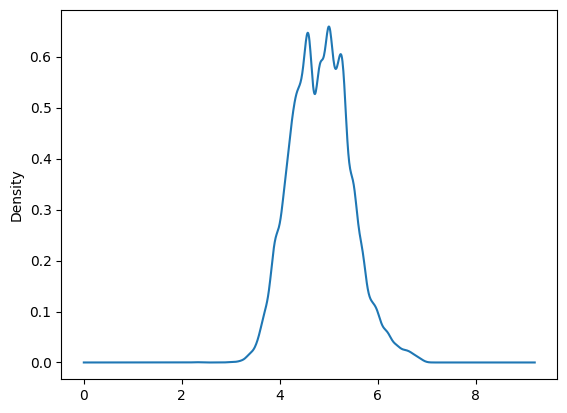

In [34]:
# kernal density
df[var].plot.density()

<Axes: >

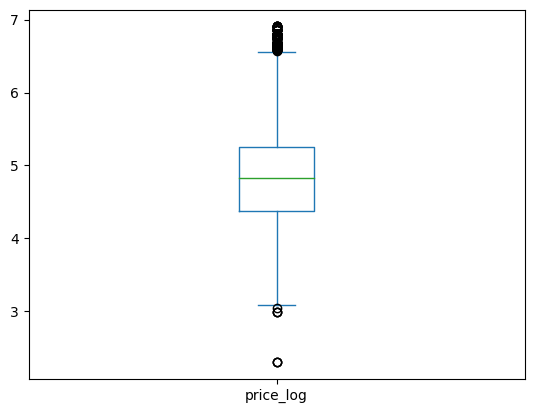

In [35]:
# box plot
df[var].plot.box()

New observations
- Taking the log drops 0s and negative values and shrinks large values
- Graphing the log of the price variable significantly helped the distribution as all the graphs now look more uniform

#### ***#5: scatterplot of price_log and beds***

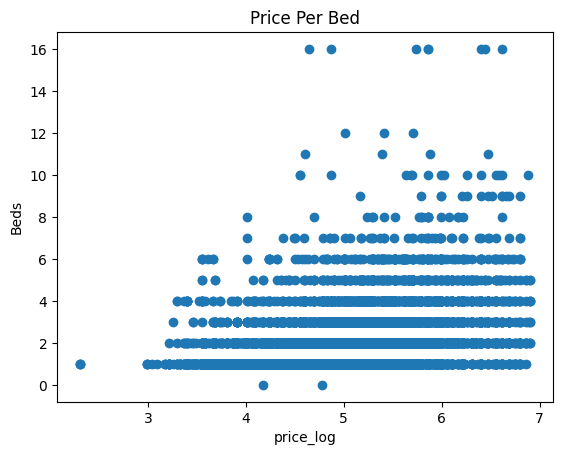

In [36]:
x = df['price_log']
y = df['Beds']
plt.scatter(x,y)
plt.xlabel('price_log')
plt.ylabel('Beds',)
plt.title('Price Per Bed')
plt.show()

Observations
- It is hard to understand how price_log corresponds to actual price, but the data follows a general pattern
- The less number of beds, the more variation in price


In [37]:
group = 'Beds'
var = 'Price'
df.loc[:,[group,var]].groupby(group).describe()

Price                                                             
        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000  236.798613  100.0  190.00  289.5  431.75  650.0
12.0      3.0  225.000000   75.000000  150.0  187.50  225.0  262.50  300.0
16.0      8.0  402.250000  235.093143  104.0  264.25  350.0  606.25  750.0

Observations
- As the bed count increases, the average price increases
- The standard deviation does not show as linear of a relationship as there is a peak around 6 and 7 beds and then another at 10 and 11
- For 12 beds, there is a relatively low standard deviation

#### ***#6: scatter plot with room and property type***

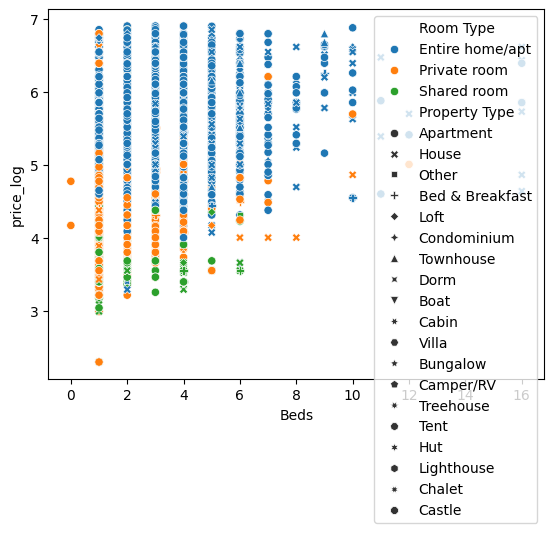

In [38]:
x = df['Beds']
y = df['price_log']
a = df['Room Type']
b = df['Property Type']
plot = sns.scatterplot(data=df, x=x, y=y, hue=a, style=b)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1, 1))

Observations
- This graph is a nice visualizations of earlier findings
- The most available room type is entire homes and apartments and the least available is shared rooms
- In terms of property type, there are a lot of circles and the letter x, indicating apartments and houses

In [39]:
var = 'Price'
group1 = 'Room Type'
group2 = 'Property Type'
df.loc[:,[group1,group2,var]].groupby([group1,group2]).describe()

Price                                 \
                                   count        mean         std    min   
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other               10.0  290.800000  273.526273   66.0   
                Townhouse           81.0  242.037037  166.755243   66.0   
                Villa                3.0  206.333333   89.667906  120.0   
Private room    Apartment        10741.0   91.605903   46.356168   10.0   
                Bed & Breakfast    155.0   97.161290   47.031971   32.0   
                Boat                 1.0  120.000000         NaN  120.0   
                Cabin                1.0   80.000000         NaN   80.0   
                Camper/RV            1.0   39.000000         NaN   39.0   
                Castle               1.0  150.000000         NaN  150.0   
                Chalet               1.0   99.000000         NaN   99.0   
                Condominium         22.0   98.590909   40.576394   46.0   
                Dorm                16.0   86.562500   40.738137   50.0   
                House             1258.0   77.750397   49.402650   25.0   
                Hut                  2.0   75.000000   35.355339   50.0   
                Loft               310.0   99.077419   63.875489   39.0   
                Other               28.0  176.642857  141.484252   39.0   
                Tent                 4.0  126.250000   94.989034   40.0   
                Townhouse           52.0   83.365385   30.578109   45.0   
                Treehouse            1.0   95.000000         NaN   95.0   
                Villa                4.0  126.250000   71.107313   60.0   
Shared room     Apartment          684.0   77.853801   57.875888   20.0   
                Bed & Breakfast     12.0  143.666667  245.328104   30.0   
                Dorm                11.0   73.181818   46.328864   30.0   
                House               79.0   46.822785   25.152743   10.0   
                Loft                49.0   78.816327   87.521824   30.0   
                Other                4.0  148.750000  134.806961   70.0   
                Townhouse            1.0   95.000000         NaN   95.0   
                Treehouse            3.0  167.666667  114.788211   95.0   

                                                               
                                    25%    50%     75%    max  
Room Type       Property Type                                  
Entire home/apt Apartment        135.00  175.0  230.00  999.0  
                Bed & Breakfast  121.00  130.0  220.00  525.0  
                Boat             122.50  150.0  182.00  250.0  
                Bungalow         133.50  160.5  177.75  195.0  
                Cabin            250.00  250.0  250.00  250.0  
                Camper/RV         49.00   74.0  114.00  325.0  
                Condominium      155.00  200.0  360.00  850.0  
                Dorm              30.00   33.5   47.75   80.0  
                House            125.00  188.0  299.00  950.0  
                Lighthouse        39.00   39.0   39.00   39.0  
                Loft             160.00  220.0  350.

In [40]:
df.loc[:, [group1, group2, var]].groupby([group1, group2]).agg(['mean','median'])

Price       
                                       mean median
Room Type       Property Type                     
Entire home/apt Apartment        200.210161  175.0
                Bed & Breakfast  184.538462  130.0
                Boat             158.428571  150.0
                Bungalow         150.750000  160.5
                Cabin            250.000000  250.0
                Camper/RV        114.333333   74.0
                Condominium      281.126761  200.0
                Dorm              44.250000   33.5
                House            234.554633  188.0
                Lighthouse        39.000000   39.0
                Loft             284.910290  220.0
                Other            290.800000  177.5
                Townhouse        242.037037  189.0
                Villa            206.333333  200.0
Private room    Apartment         91.605903   82.0
                Bed & Breakfast   97.161290   85.0
                Boat             120.000000  120.0
                Cabin             80.000000   80.0
                Camper/RV         39.000000   39.0
                Castle           150.000000  150.0
                Chalet            99.000000   99.0
                Condominium       98.590909   90.0
                Dorm              86.562500   70.0
                House             77.750397   69.0
                Hut               75.000000   75.0
                Loft              99.077419   85.0
                Other            176.642857  114.0
                Tent             126.250000  107.5
                Townhouse         83.365385   80.0
                Treehouse         95.000000   95.0
                Villa            126.250000  125.0
Shared room     Apartment         77.853801   66.0
                Bed & Breakfast  143.666667   65.0
                Dorm              73.181818   55.0
                House             46.822785   45.0
                Loft              78.816327   50.0
                Other            148.750000   87.5
                Townhouse         95.000000   95.0
                Treehouse        167.666667  108.0

Observations
- Apartments and bed and breakfasts have the highest average prices
- Townhouses, treehouses, and villas have the lowest average prices
- The standard deviation is much more varied
  - For entire homes, the largest deviations are the other category, lofts, and condominiums
  - For private rooms, other, tents, and villas are the highest
  - For shared rooms, Bed and Breakfast's, other, and treehouses are the highest
- For all three room types, the mean and median are relatively similar. The median is almost always lower, and the larger the mean, the wider the gap between the two measures. Given the amount of outliers seen in the first set of graphs, it is best to use the median as a reliable estimate of central tendency

#### ***#7: price_log and beds seaborn jointplot***

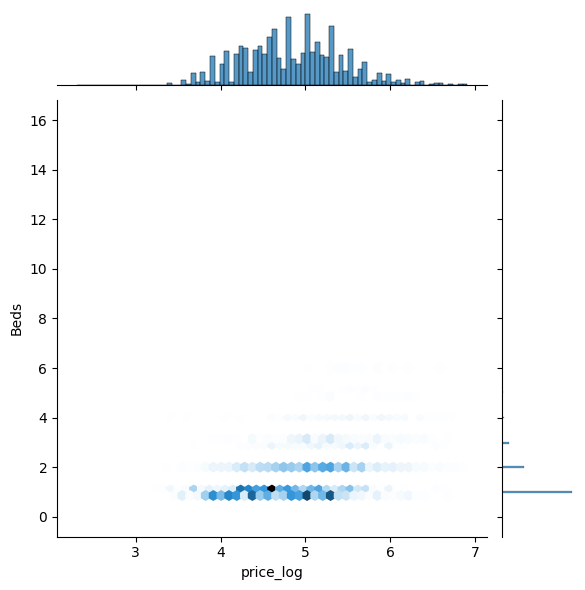

In [41]:
import seaborn as sns
var1 = 'price_log'
var2 = 'Beds'
sns.jointplot(data=df, x=var1, y=var2, kind='hex')

Observations
- The majority of property types only have a small number of beds available
- The majority of property types also fall into the same price range
- The other graphs emphasize the outliers, where as this one represents the majority which is more helpful in understanding overall patterns

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

#### ***#1: Picking a dataset*** - Opioid Prescribing Rates by Geography
- https://data.cms.gov/summary-statistics-on-use-and-payments/medicare-medicaid-opioid-prescribing-rates/medicare-part-d-opioid-prescribing-rates-by-geography
  - I worked in healthcare consulting this summer so I learned a lot about cms and prescribing rates

#### ***#2: Data Dictionary***
- Clearly describes variables and what they are
- Clearly explains different value options for categorical variables
  - Prescriber geographic level: national, state, county, or ZIP
  - Breakout: overall, rural, or urban
- For numerical values, it exlpains difference between variables and calculations
  - Some of the explanations are very nuanced but still accessible
- The data dictionary does not describe missing values for all numerical variables, but the year calculations include "no change" as a possible outcome

#### ***#3: Selecting variables***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/OMT_MDCR_RY24_P04_V10_YTD22_GEO.csv', low_memory=False)
df.head()

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,Prscrbr_Geo_Desc,RUCA_Cd,Breakout_Type,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
0,2022,National,NaN,National,NaN,Totals,Overall,1329561.0,787651.0,59766596.0,1.541264e+09,3.88,-1.18,-0.20,5600908.0,9.37,-3.08,-0.53
1,2022,National,NaN,National,NaN,Rural/Urban,Rural,140872.0,93044.0,10220740.0,2.575312e+08,3.97,-1.22,-0.21,890197.5,8.71,-3.09,-0.52
2,2022,National,NaN,National,NaN,Rural/Urban,Urban,1187577.0,693963.0,49503950.0,1.282801e+09,3.86,-1.17,-0.20,5361238.0,10.83,-2.76,-0.52
3,2022,State,1.0,Alabama,NaN,Totals,Overall,17057.0,9744.0,1659504.0,2.917501e+07,5.69,-1.52,-0.31,107726.0,6.49,-2.84,-0.33
4,2022,State,2.0,Alaska,NaN,Totals,Overall,2917.0,1833.0,75290.0,1.713677e+06,4.39,-2.00,-0.50,10126.0,13.45,-5.88,-2.90


Variables of interest

1.  **What fraction of prescribers prescribe opioids:** Total prescribers vs. opioid prescribers
4.   **What proportion of claims are opioid claims:** Total claims vs. opioid claims
2.   **How do claims vary by geographic level:** Geographic level vs. total claims
5.   **What is the opioid rate in different areas:** Geographic level vs. opioid prescriber rate
3.   **How do claims vary by urban vs. rural environments:** Breakout vs. total claims
3.   **How do opioid rates differ in urban vs. rural environments:** Breakout vs. opioid prescriber rate
6.   **How has the opioid rate changed over time:** Opioid prescribing rate vs. one-year rate vs. five-year rate



In [4]:
# varaibles that are already clean: breakout, all numeric
# not interested in the variables will missing values: prscrbr_geo_cd, ruca_cd

print(df['Prscrbr_Geo_Desc'].unique(),'\n')
print(df['Prscrbr_Geo_Desc'].value_counts(),'\n')
print(df['Prscrbr_Geo_Desc'].describe(), '\n')

print(df['Prscrbr_Geo_Lvl'].unique(),'\n')
print(df['Prscrbr_Geo_Lvl'].value_counts(),'\n')
print(df['Prscrbr_Geo_Lvl'].describe(), '\n')

['National' 'Alabama' 'Alaska' ... 'Washington:Thurston:98576'
 'Washington:Cowlitz:98625' 'Alaska:Fairbanks North Star:99710'] 

Prscrbr_Geo_Desc
National                   30
Ohio:Wyandot               30
Ohio:Trumbull              30
Ohio:Tuscarawas            30
Ohio:Union                 30
                           ..
New York:Oneida:13438       1
Oregon:Marion:97352         1
Colorado:Gunnison:81225     1
Oregon:Benton:97339         1
Kentucky:Pike:41528         1
Name: count, Length: 25290, dtype: int64 

count       298404
unique       25290
top       National
freq            30
Name: Prscrbr_Geo_Desc, dtype: object 

['National' 'State' 'County' 'ZIP'] 

Prscrbr_Geo_Lvl
ZIP         201552
County       95142
State         1680
National        30
Name: count, dtype: int64 

count     298404
unique         4
top          ZIP
freq      201552
Name: Prscrbr_Geo_Lvl, dtype: object 



I intended to use description to isolate specific states, however the data is organized by state, state:city, and state:city:zip and I do not think it is necessary to re organization the data on the state level since the data is so big. Instead, I will use the level variable which gives a general understanding of the type of geographic areas. Additionally, I am more interested in the numerical variables.

#### ***#4: Visualizations***

count    2.940330e+05
mean     2.812397e+02
std      9.492873e+03
min      0.000000e+00
25%      3.000000e+00
50%      1.500000e+01
75%      6.500000e+01
max      1.329561e+06
Name: Tot_Prscrbrs, dtype: float64 



<Axes: >

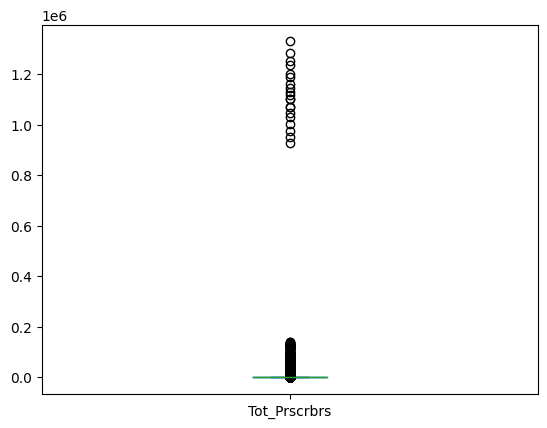

In [5]:
# numeric variable box plots

# all prescribers
print(df['Tot_Prscrbrs'].describe(),'\n')
df['Tot_Prscrbrs'].plot.box()

count    294033.000000
mean        191.558604
std        6414.504542
min           0.000000
25%           2.000000
50%          11.000000
75%          45.000000
max      819674.000000
Name: Tot_Opioid_Prscrbrs, dtype: float64 



<Axes: >

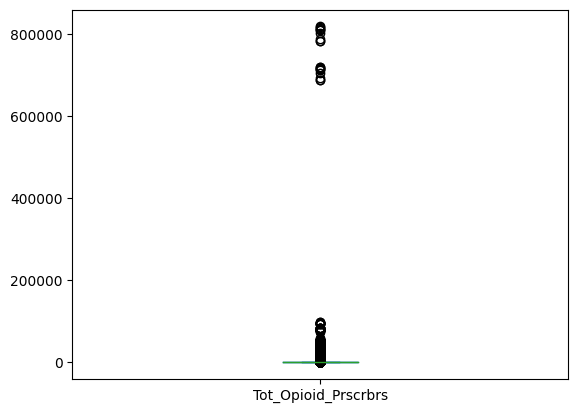

In [6]:
# opioid prescribers
print(df['Tot_Opioid_Prscrbrs'].describe(),'\n')
df['Tot_Opioid_Prscrbrs'].plot.box()

count    2.940330e+05
mean     3.508075e+05
std      1.147432e+07
min      0.000000e+00
25%      2.997000e+03
50%      2.804200e+04
75%      1.097710e+05
max      1.541264e+09
Name: Tot_Clms, dtype: float64 



<Axes: >

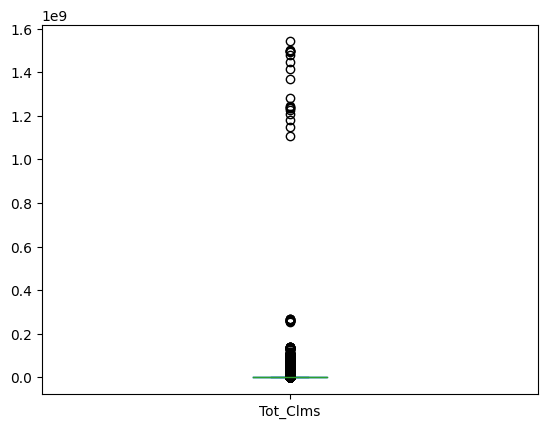

In [7]:
# all claims
print(df['Tot_Clms'].describe(),'\n')
df['Tot_Clms'].plot.box()

count    2.799910e+05
mean     1.784579e+04
std      5.711559e+05
min      0.000000e+00
25%      1.520000e+02
50%      1.294000e+03
75%      5.286000e+03
max      8.099936e+07
Name: Tot_Opioid_Clms, dtype: float64 



<Axes: >

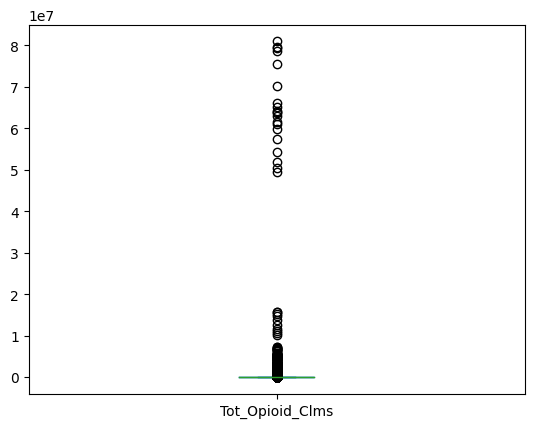

In [8]:
# opioid claims
print(df['Tot_Opioid_Clms'].describe(),'\n')
df['Tot_Opioid_Clms'].plot.box()

Counts vary significantly at each collection so there is a wide range

count    255762.000000
mean          5.188223
std           5.289357
min           0.000000
25%           2.790000
50%           4.300000
75%           6.070000
max         100.000000
Name: Opioid_Prscrbng_Rate, dtype: float64 



<Axes: >

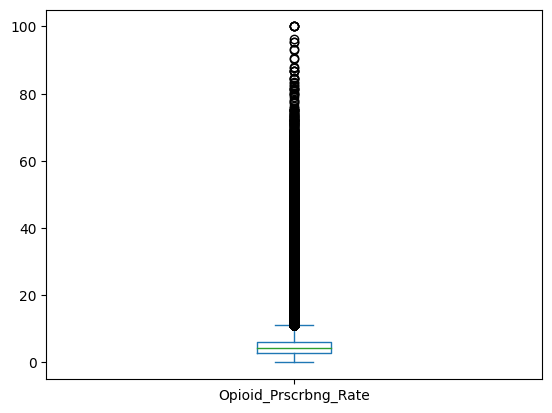

In [9]:
# opioid prescribing rate
print(df['Opioid_Prscrbng_Rate'].describe(),'\n')
df['Opioid_Prscrbng_Rate'].plot.box()

This graph is a little more normal looking

Breakout
Overall    233836
Rural       32284
Urban       32284
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



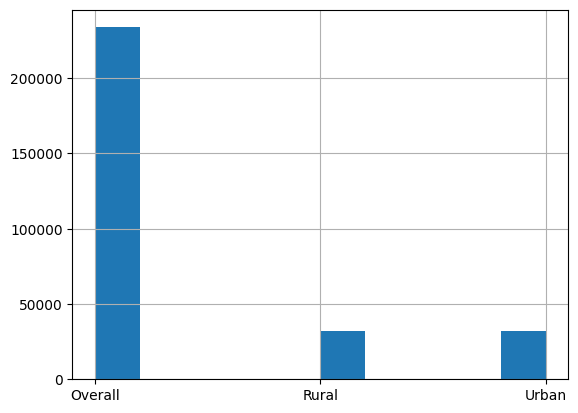

In [10]:
# categorical variable bar graphs

# breakout type
print(df['Breakout'].value_counts(),'\n')
print(df['Breakout'].hist(), '\n')
# urban and rural are fairly equal, most of the data is lumped together and not separated by this condition

Prscrbr_Geo_Lvl
ZIP         201552
County       95142
State         1680
National        30
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



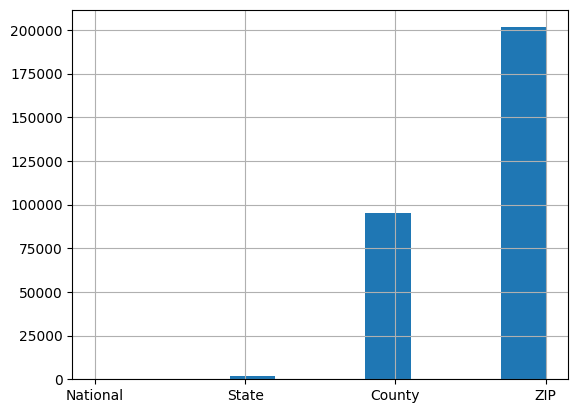

In [11]:
# geographic level
print(df['Prscrbr_Geo_Lvl'].value_counts(),'\n')
print(df['Prscrbr_Geo_Lvl'].hist(), '\n')
# majority of data was collected at the zip code level

Categorical variables are much more interesting to look at on their own

#### ***#5: Visualizations pt. 2***

<Axes: >

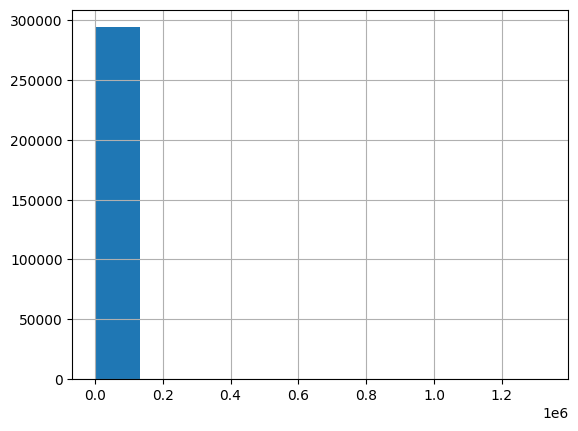

In [12]:
# histogram does not reveal any insights
df['Tot_Prscrbrs'].hist()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

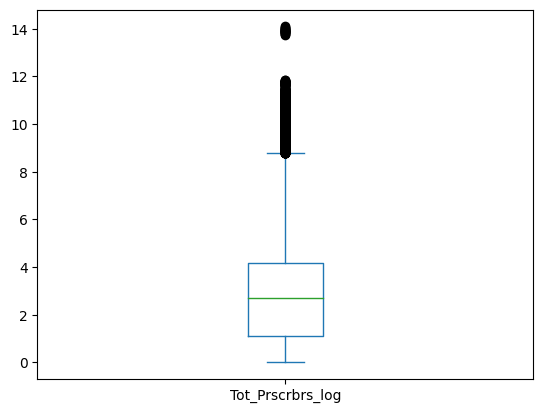

In [14]:
# taking the log of prescribers helps to even out the graph
df['Tot_Prscrbrs_log'] = np.log(df['Tot_Prscrbrs'])
df['Tot_Prscrbrs_log'].plot.box()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

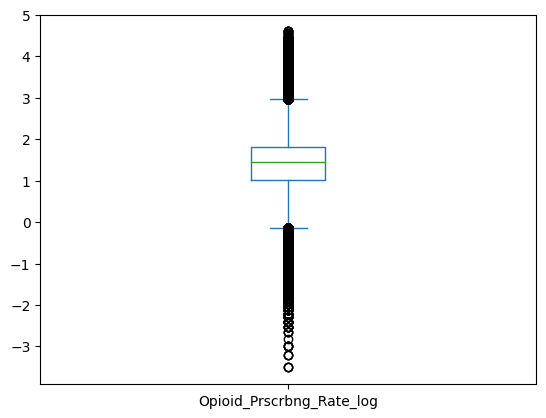

In [13]:
df['Opioid_Prscrbng_Rate_log'] = np.log(df['Opioid_Prscrbng_Rate'])
df['Opioid_Prscrbng_Rate_log'].plot.box()

Transformation shows a little more concentration of prescriber rates

<Axes: ylabel='Density'>

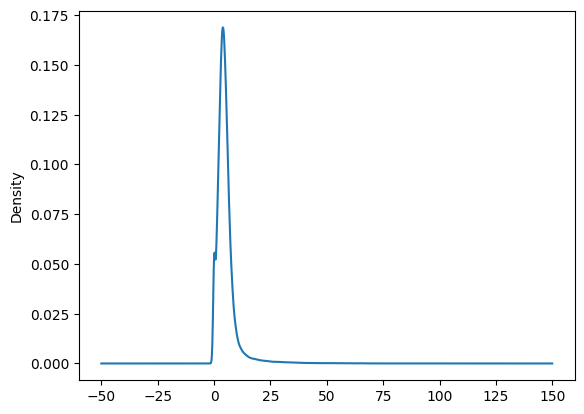

In [15]:
df['Opioid_Prscrbng_Rate'].plot.density()

#### ***#6: Scatter Plot***

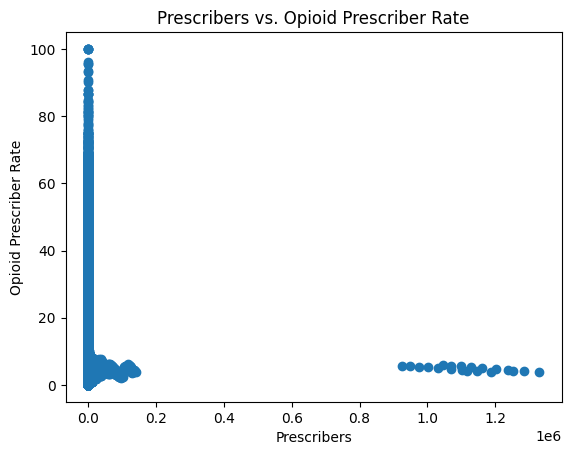

In [16]:
x = df['Tot_Prscrbrs']
y = df['Opioid_Prscrbng_Rate']
plt.scatter(x, y)
plt.xlabel('Prescribers')
plt.ylabel('Opioid Prescriber Rate')
plt.title('Prescribers vs. Opioid Prescriber Rate')
plt.show()

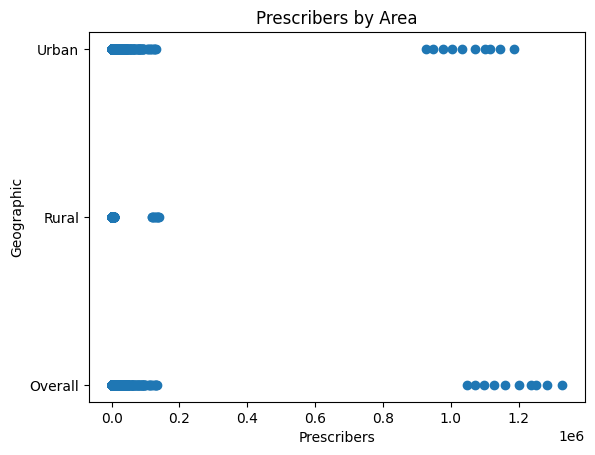

In [17]:
x = df['Tot_Prscrbrs']
y = df['Breakout']
plt.scatter(x,y)
plt.xlabel('Prescribers')
plt.ylabel('Geographic',)
plt.title('Prescribers by Area')
plt.show()

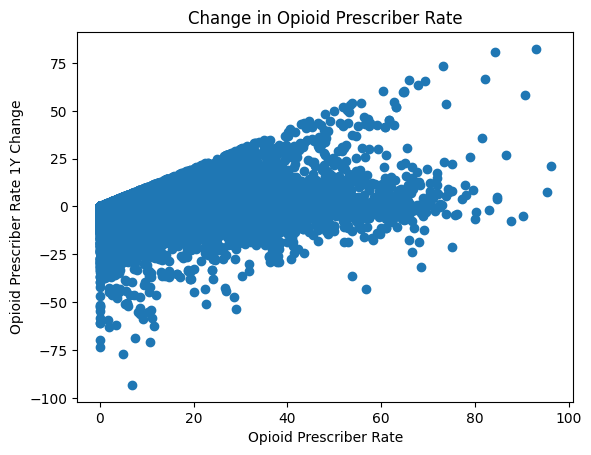

In [18]:
x = df['Opioid_Prscrbng_Rate']
y = df['Opioid_Prscrbng_Rate_1Y_Chg']
plt.scatter(x, y)
plt.xlabel('Opioid Prescriber Rate')
plt.ylabel('Opioid Prescriber Rate 1Y Change')
plt.title('Change in Opioid Prescriber Rate')
plt.show()

#7: Cross-Tabulation


In [19]:
# total prescribers by area
pd.crosstab(df['Tot_Prscrbrs'], df['Breakout'])

Breakout,Overall,Rural,Urban
Tot_Prscrbrs,,,
0.0,0,8329,16103
1.0,29398,730,887
2.0,14449,616,521
3.0,10572,558,481
4.0,8771,624,467
...,...,...,...
1201978.0,1,0,0
1237826.0,1,0,0
1252553.0,1,0,0


In [20]:
# total opioid prescribers by area
pd.crosstab(df['Tot_Opioid_Prscrbrs'], df['Breakout'])

Breakout,Overall,Rural,Urban
Tot_Opioid_Prscrbrs,,,
0.0,11657,8511,16391
1.0,27939,848,932
2.0,15001,756,571
3.0,11243,699,552
4.0,9365,798,521
...,...,...,...
811826.0,1,0,0
812894.0,1,0,0
816009.0,1,0,0


In [21]:
pd.crosstab(df['Tot_Clms'], df['Breakout'])

Breakout,Overall,Rural,Urban
Tot_Clms,,,
0.000000e+00,0,8329,16103
1.100000e+01,364,5,8
1.200000e+01,352,0,5
1.300000e+01,309,1,7
1.400000e+01,281,3,4
...,...,...,...
1.494800e+09,1,0,0
1.497437e+09,1,0,0
1.497842e+09,1,0,0


In [22]:
# opioid claims
pd.crosstab(df['Tot_Opioid_Clms'], df['Breakout'])

Breakout,Overall,Rural,Urban
Tot_Opioid_Clms,,,
0.0,11657,8460,16237
11.0,571,12,20
12.0,693,20,17
13.0,528,18,15
14.0,539,17,16
...,...,...,...
75502859.0,1,0,0
78783195.0,1,0,0
79479606.0,1,0,0


In [23]:
# opioid rate by area
pd.crosstab(df['Opioid_Prscrbng_Rate'], df['Breakout'])

Breakout,Overall,Rural,Urban
Opioid_Prscrbng_Rate,,,
0.00,11657,180,288
0.03,3,0,0
0.04,3,0,0
0.05,4,1,0
0.06,1,0,0
...,...,...,...
93.10,1,0,0
93.33,1,0,0
95.45,2,0,0


If I were to do this exploration again, I would choose a smaller dataset. It is hard to understand what is happening in some of the cross-tabulations and it would have been easier to work with if the overall volume and range within variables were smaller. However, I was able to continue practicing my wrangling and visualization skills and can now identify when a variable does not behave in the way I expect it to.